**1. Packages installation**

In [ ]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn
####

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.4 MB/s eta 0:00:00
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [ ]:
#Import Package

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,recall_score, f1_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import  cross_val_score

In [ ]:
pip install Qiskit

In [ ]:
pip install qiskit-machine-learning

In [ ]:
pip install qiskit-algorithms

In [ ]:
pip install qiskit_aer

In [ ]:
pip install qiskit_ibm_runtime

In [ ]:
pip install tensorflow

**2. Read Input CSV From Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read KIRC datasets

df= pd.read_csv("/content/drive/My Drive/Quantum_Machine_Learning/mRNA_Python_code/KIRC_outliers_fix.csv")

df

,ENSG00000004939.12,ENSG00000070915.8,ENSG00000074803.16,ENSG00000086159.11,ENSG00000100362.11,ENSG00000102678.6,ENSG00000104413.14,ENSG00000105929.14,ENSG00000113889.10,ENSG00000115507.8,...,ENSG00000184908.16,ENSG00000186766.7,ENSG00000188175.8,ENSG00000214128.9,ENSG00000223350.2,ENSG00000231290.4,ENSG00000241233.2,ENSG00000260802.1,ENSG00000277011.1,Class Labels
0,4.000000,3.459432,6.658211,2.000000,2.807355,2.584963,5.247928,4.459432,4.247928,0.000000,...,4.459432,5.209453,1.000000,5.087463,3.169925,4.087463,2.584963,3.000000,4.169925,0
1,4.954196,4.754888,3.700440,2.321928,1.584963,1.584963,1.000000,3.321928,1.584963,1.000000,...,4.584963,3.459432,2.000000,3.000000,2.807355,2.321928,3.000000,0.000000,2.807355,0
2,5.129283,5.781360,8.939579,2.321928,0.000000,1.000000,1.000000,7.303781,1.584963,1.000000,...,5.754888,1.000000,1.000000,5.700440,6.475733,3.000000,1.000000,2.321928,1.584963,0
3,6.768184,6.066089,8.924813,4.247928,3.906891,3.807355,6.066089,5.554589,7.159871,2.807355,...,5.906891,4.459432,3.169925,5.930737,1.000000,3.807355,3.807355,2.584963,2.807355,0
4,3.169925,5.357552,6.044394,2.000000,4.169925,4.754888,3.584963,4.321928,2.321928,1.584963,...,5.392317,4.169925,1.000000,4.523562,2.321928,5.169925,0.000000,2.584963,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,3.459432,3.807355,4.643856,2.807355,1.000000,1.584963,3.700440,2.321928,3.000000,2.000000,...,5.727920,1.584963,1.584963,3.000000,2.807355,3.169925,1.584963,0.000000,2.807355,1
498,3.169925,3.807355,6.894818,0.000000,1.000000,4.087463,3.700440,3.321928,2.000000,3.169925,...,4.392317,3.584963,0.000000,2.321928,4.000000,3.459432,1.584963,3.321928,1.000000,1
499,2.000000,1.000000,2.807355,2.000000,3.169925,3.169925,2.807355,3.459432,7.149747,5.977280,...,6.714246,0.000000,3.459432,1.000000,5.754888,3.807355,0.000000,2.000000,0.000000,1
500,3.321928,4.906891,8.144658,1.584963,2.000000,1.584963,0.000000,3.321928,2.321928,2.807355,...,4.321928,4.523562,1.584963,2.584963,6.392317,1.584963,2.000000,3.807355,0.000000,1


In [ ]:
#Number of data and column(502 data patients,48 gene features,1 class labels  )
print("The shape of the dataset :",df.shape)

The shape of the dataset : (502, 49)


In [ ]:
# Class label (0 = non metastasis(Negative), 1 = metastasis(Positive))

print("Number of data each class :")
print(df['Class Labels'].value_counts())

Number of data each class :
Class Labels
0    424
1     78
Name: count, dtype: int64


In [ ]:
#select 48 column gene(Features)
column_data = df.drop('Class Labels',axis=1)
#nc=df.drop(48,axis=0)
print ('48 features :',column_data.columns)
#print ('48 features :',nc.columns)

48 features : Index(['ENSG00000004939.12', 'ENSG00000070915.8', 'ENSG00000074803.16',
       'ENSG00000086159.11', 'ENSG00000100362.11', 'ENSG00000102678.6',
       'ENSG00000104413.14', 'ENSG00000105929.14', 'ENSG00000113889.10',
       'ENSG00000115507.8', 'ENSG00000116039.10', 'ENSG00000118271.8',
       'ENSG00000122194.17', 'ENSG00000132677.11', 'ENSG00000132698.12',
       'ENSG00000133020.4', 'ENSG00000133742.12', 'ENSG00000135480.13',
       'ENSG00000140519.11', 'ENSG00000141750.6', 'ENSG00000147606.7',
       'ENSG00000147614.3', 'ENSG00000149452.14', 'ENSG00000152931.7',
       'ENSG00000153292.14', 'ENSG00000157703.14', 'ENSG00000163631.15',
       'ENSG00000164122.7', 'ENSG00000164363.9', 'ENSG00000164756.11',
       'ENSG00000166105.14', 'ENSG00000167741.9', 'ENSG00000167748.9',
       'ENSG00000168878.15', 'ENSG00000169344.14', 'ENSG00000170044.7',
       'ENSG00000173253.13', 'ENSG00000184601.9', 'ENSG00000184905.7',
       'ENSG00000184908.16', 'ENSG00000186766.7', 'EN

In [ ]:
#features are gene values each column (X)
#take the values each column gene
features = column_data.values
print("Feature values each column :\n",features)

Feature values each column :
 [[4.         3.45943162 6.65821148 ... 2.5849625  3.         4.169925  ]
 [4.95419631 4.7548875  3.70043972 ... 3.         0.         2.80735492]
 [5.12928302 5.78135971 8.93957921 ... 1.         2.3219281  1.5849625 ]
 ...
 [2.         1.         2.80735492 ... 0.         2.         0.        ]
 [3.3219281  4.9068906  8.14465824 ... 2.         3.80735492 0.        ]
 [3.5849625  5.61470984 1.5849625  ... 3.45943162 0.         1.        ]]


**3.PCA**

In [ ]:
C = np.cov(features, rowvar = False)
C

array([[6.31400863, 1.61859605, 2.68008916, ..., 1.47356298, 0.87144961,
        2.41827279],
       [1.61859605, 3.0572278 , 2.44421809, ..., 0.4464754 , 0.43577004,
        1.15795855],
       [2.68008916, 2.44421809, 8.86847661, ..., 0.38271747, 0.0456047 ,
        2.10495694],
       ...,
       [1.47356298, 0.4464754 , 0.38271747, ..., 2.0148875 , 0.69813203,
        1.08408124],
       [0.87144961, 0.43577004, 0.0456047 , ..., 0.69813203, 3.21752911,
        1.19182872],
       [2.41827279, 1.15795855, 2.10495694, ..., 1.08408124, 1.19182872,
        5.23324142]])

In [ ]:
#eignvalues

eigenvalues,eigenvectors = np.linalg.eig(C)
u, sigma, vt=np.linalg.svd(C)
print('eigenvalues :',eigenvalues)
print('eigenvectors :',eigenvectors)
print('sigma :',sigma)

eigenvalues : [83.12558608 37.39363306 15.25560441 13.38003844 10.54639665  9.12598276
  8.20795753  6.24126805  6.04113189  5.57158744  5.13499576  4.97008894
  4.77548306  4.37891316  4.03006282  3.68839919  3.56718419  3.23217853
  2.89443957  2.82055213  2.71172027  2.49221404  2.32033257  2.26016688
  2.15010959  2.00072938  1.97087524  0.48159818  1.79271377  1.74685744
  1.63251625  1.5856783   1.48192738  0.67506776  0.70078704  0.7237443
  0.75008122  1.36166497  1.31220995  1.28353189  1.20251548  0.86081559
  0.88764504  1.1105719   1.08996305  0.96380406  0.98976566  1.02243778]
eigenvectors : [[-0.18600688  0.04467231  0.03943974 ...  0.03957318 -0.14743583
   0.01955431]
 [-0.11174344  0.05857028  0.09215696 ... -0.17443608 -0.00217815
   0.29109588]
 [-0.17963442  0.20937819  0.08433683 ...  0.07462929  0.03498565
   0.03233471]
 ...
 [-0.07023244 -0.01366095 -0.01530089 ...  0.02466101  0.14497622
  -0.15867157]
 [-0.07807957 -0.08701048  0.03374119 ...  0.0211534   0.1

In [ ]:
#Create dimension reduction from 48 features to 10 features
n_com=10
pca=PCA(n_components=n_com)
principalComponents=pca.fit_transform(features)

<Axes: >

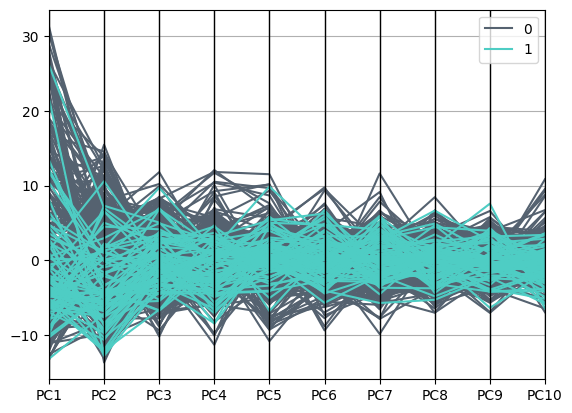

In [ ]:
#save the 10PCs using dataframe
principalDf=pd.DataFrame(data=principalComponents,
                         columns=['PC1',
                                  'PC2',
                                  'PC3', 'PC4','PC5', 'PC6',
                                 'PC7', 'PC8','PC9', 'PC10'])
finalDf=pd.concat([principalDf, df[['Class Labels']]],axis=1)
finalDf.head()
pd.plotting.parallel_coordinates(
finalDf, 'Class Labels', color=('#556270', '#4ECDC4'))

In [ ]:
#Print the new 10PCs dataframe
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Class Labels
0,1.128417,4.613620,-2.358345,3.114786,0.818953,-1.188183,3.347398,0.034313,2.376725,-3.849785,0
1,-9.047335,7.653424,1.408642,-0.214506,-3.011776,-2.530816,1.491465,2.206101,-1.757509,0.787053,0
2,-4.735183,3.316204,0.628462,-2.031487,2.735467,-2.271867,2.390916,-0.396665,-6.920496,1.745091,0
3,7.156388,14.169738,-2.848791,-1.157578,-1.656177,2.239014,0.827309,2.114941,5.784383,-0.149722,0
4,-1.062123,5.695566,0.333399,0.338678,0.736979,-3.690595,-2.116826,1.032939,0.321923,-2.256027,0


In [ ]:
#the shape of the new 10PCs dataframe
finalDf.shape

(502, 11)

In [ ]:
# Splitting the dataset into the Training set and Test set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#
# X is 10 PCs and y is Class label (0 = non metastasis(Negative), 1 = metastasis(Positive))

X_PCA = finalDf.drop('Class Labels',axis=1).values
y_PCA = finalDf['Class Labels'].values

#if you use random_state=some_number(0,42,82),
#then we can guarantee that the spliting data output of Run 1 will be equal to the output of Run 2

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y_PCA, test_size=1/3,train_size=2/3,random_state=42)

print("X Training set :",X_train.shape)
print("y Training set :",y_train.shape)
print("X Test set :",X_test.shape)
print("y Test set :",y_test.shape)

print("X_train value :",X_train)
print("Y_train value :",y_train)
print("X_test value :",X_test)
print("Y_test value :",y_test)

X Training set : (334, 10)
y Training set : (334,)
X Test set : (168, 10)
y Test set : (168,)
X_train value : [[  0.38198156  -4.26883794   1.01635857 ...   3.46429799   0.16087777
    0.63892281]
 [  6.3242413    1.00684512   6.43273919 ...  -2.41289338  -2.36096727
    8.59786913]
 [ -3.58794084  -1.39950594  -2.19928655 ...   1.32813161  -4.30101181
   -1.98141901]
 ...
 [  0.72066867 -10.29631365  -3.09077886 ...   0.07447053  -2.45282148
   -0.1974231 ]
 [ -2.37790697  -4.0247418   -6.74244366 ...   0.33805151  -4.18554531
   -4.14851819]
 [  0.45899689   2.65195388   3.97412062 ...   2.64584757  -2.20221128
    6.49464023]]
Y_train value : [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [ ]:

n_feat = n_com
n_train = y_train.shape
n_test = y_test.shape

**4. Imbalance Dataset Using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Split the data to train and test dataset.


y_before_sm = Counter(y_train)
print('Number of data before applying SMOTE :',y_before_sm)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=82,k_neighbors=5)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

y_after_sm = Counter(y_train_sm)
print('Number of data after applying SMOTE :',y_after_sm)

Number of data before applying SMOTE : Counter({0: 286, 1: 48})
Number of data after applying SMOTE : Counter({1: 286, 0: 286})


ERROR: Could not find a version that satisfies the requirement sklearn.utils._pprint (from versions: none)
ERROR: No matching distribution found for sklearn.utils._pprint


**5. Classical SVM Classification**

In [ ]:
#Classification using data after smote and using default svm parameter
from sklearn import svm
svn_sm = svm.SVC()
svn_sm.fit(X_train_sm, y_train_sm)

SVC()

In [ ]:
# Predict from the test dataset

pred_sm = svn_sm.predict(X_test)

# Calculate the accuracy
print("Accuracy after using SMOTE :",accuracy_score(y_test, pred_sm))

Accuracy after using SMOTE : 0.7321428571428571


In [ ]:
# classification report
print("Classification after using SMOTE :\n")
print(classification_report(y_test, pred_sm))

print("F1 score:",f1_score(y_test, pred_sm))
print("Recall score:",recall_score(y_test, pred_sm))
print("Accuracy score:",accuracy_score(y_test, pred_sm))

Classification after using SMOTE :

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       138
           1       0.33      0.47      0.38        30

    accuracy                           0.73       168
   macro avg       0.60      0.63      0.61       168
weighted avg       0.77      0.73      0.75       168

F1 score: 0.3835616438356165
Recall score: 0.4666666666666667
Accuracy score: 0.7321428571428571


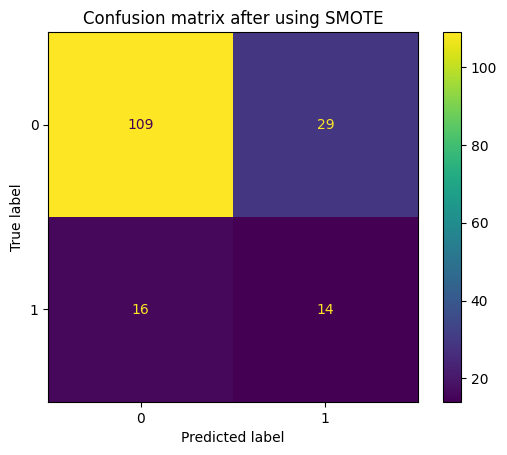

In [ ]:
ConfusionMatrixDisplay.from_estimator(svn_sm, X_test, y_test)
plt.title("Confusion matrix after using SMOTE")
plt.show()

**6. Hyperparameter Tunning Classical SVM Classification**

In [ ]:
#Optimation C and gamma parameter
#reference: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/?ref=rp

#set the new for : C = [ 60, 80, 100, 120, 140], gamma = 10e-5 [1/4, 1/2 , 1, 2, 4]
#print out the accuracy each combination
# defining parameter range
param_grid = {'C': [1,20,40,60, 80, 100, 120, 140,160,180,200,210,215,220,225,230,235,240,260],
              'gamma': ['scale',(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4)],
             'kernel': ['rbf']}
from sklearn.svm import SVC

#param_grid = {'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'kernel': ['rbf']}

#this code for print 'recall','f1','accuracy', set refit=false
#grid = GridSearchCV(SVC(), param_grid,scoring=['recall','f1','accuracy'], refit = False, verbose = 3)

#this code for search the best parameters
#set refit=true to outomatic select the best parameter and set to svm model
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5,scoring='f1')


# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ....C=1, gamma=2.5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END ....C=1, gamma=2.5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5] END ....C=1, gamma=2.5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END ....C=1, gamma=2.5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ....C=1, gamma=2.5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ......C=1, gamma=5e-05, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END ......C=1, gamma=5e-05, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
                               210, 215, 220, 225, 230, 235, 240, 260],
                         'gamma': ['scale', 2.5e-05, 5e-05, 0.0001, 0.0002,
                                   0.0004],
                         'kernel': ['rbf']},
             scoring='f1', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 180, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=180)


In [ ]:
#grid_predictions = grid.predict(X_test)
grid_predictions = grid.predict(X_test)

In [ ]:
# classification report
print("SVM Classification using optimal C and gamma parameter :\n")
print(classification_report(y_test, grid_predictions))

print("F1 score:",f1_score(y_test, grid_predictions))
print("Recall score:",recall_score(y_test, grid_predictions))
print("Accuracy score:",accuracy_score(y_test, grid_predictions))

SVM Classification using optimal C and gamma parameter :

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.29      0.27      0.28        30

    accuracy                           0.75       168
   macro avg       0.56      0.56      0.56       168
weighted avg       0.74      0.75      0.75       168

F1 score: 0.2758620689655172
Recall score: 0.26666666666666666
Accuracy score: 0.75


In [ ]:
# Compute confusion matrix
cm2 = confusion_matrix(y_test, grid_predictions)
print("SVM Confusion matrix using optimal C and gamma parameter:\n")
print(cm2)

SVM Confusion matrix using optimal C and gamma parameter:

[[118  20]
 [ 22   8]]


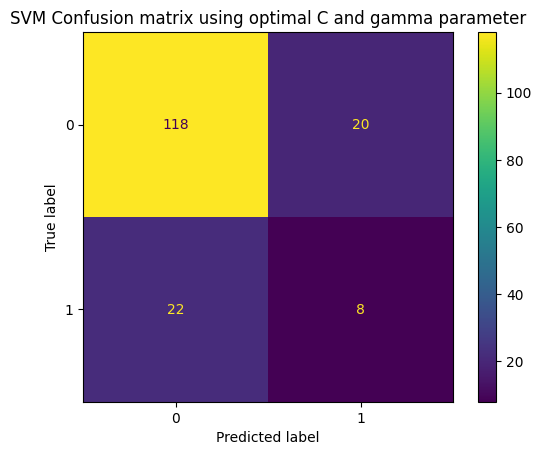

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
plt.title("SVM Confusion matrix using optimal C and gamma parameter")
plt.show()

**7. Hyperparameter Tunning Classical SVM Classification by Using StratifiedKFold**

In [ ]:
from sklearn.model_selection import StratifiedKFold
splits=5
skf = StratifiedKFold(n_splits=splits)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score


In [ ]:
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]

gamma_values =['scale',(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4)]
C_values = [1,20,40,60,80,100,120,140,160,180,200,210,215,220,225,230,235,240,260]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):

    svc = SVC(kernel='rbf', gamma=gamma_val, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = y_train[train_index], y_train[val_index]

# Train the QSVC classifier
        svc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = svc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")


Fold 0:
gamma: scale C: 1 F1: [0.0]
Fold 1:
gamma: scale C: 1 F1: [0.0, 0.0]
Fold 2:
gamma: scale C: 1 F1: [0.0, 0.0, 0.0]
Fold 3:
gamma: scale C: 1 F1: [0.0, 0.0, 0.0, 0.0]
Fold 4:
gamma: scale C: 1 F1: [0.0, 0.0, 0.0, 0.0, 0.0]
Fold 0:
gamma: scale C: 20 F1: [0.3157894736842105]
Fold 1:
gamma: scale C: 20 F1: [0.3157894736842105, 0.23529411764705882]
Fold 2:
gamma: scale C: 20 F1: [0.3157894736842105, 0.23529411764705882, 0.37499999999999994]
Fold 3:
gamma: scale C: 20 F1: [0.3157894736842105, 0.23529411764705882, 0.37499999999999994, 0.11764705882352941]
Fold 4:
gamma: scale C: 20 F1: [0.3157894736842105, 0.23529411764705882, 0.37499999999999994, 0.11764705882352941, 0.34782608695652173]
Fold 0:
gamma: scale C: 40 F1: [0.3636363636363636]
Fold 1:
gamma: scale C: 40 F1: [0.3636363636363636, 0.23529411764705882]
Fold 2:
gamma: scale C: 40 F1: [0.3636363636363636, 0.23529411764705882, 0.25]
Fold 3:
gamma: scale C: 40 F1: [0.3636363636363636, 0.23529411764705882, 0.25, 0.125]
Fold 4:
ga

In [ ]:
#SVM using best gamma and C by rbf kernel
svc = SVC(gamma=best_gamma, C=best_C,kernel='rbf')


# Train the QSVC classifier
svc.fit(X_train, y_train)

# Predict the labels for the test data
pred_labels = svc.predict(X_test)

# Evaluate the classification accuracy
svc_score = svc.score(X_test, y_test)

print(f"SVM classification test score: {svc_score}")

SVC classification test score: 0.7440476190476191


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("SVM result StratifiedKFold:\n")
print(classification_report(y_test, pred_labels))
print("F1 :",f1_score(y_test, pred_labels))

SVM result:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.26      0.23      0.25        30

    accuracy                           0.74       168
   macro avg       0.55      0.54      0.55       168
weighted avg       0.73      0.74      0.74       168

F1 : 0.2456140350877193


**8. QSVM Without NN**

In [ ]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

fidelity = ComputeUncompute(sampler=Sampler())

In [ ]:
#create a new quantum kernel with the fidelity instance.
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = ZZFeatureMap(n_feat)
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=new_kernel)
qsvc.fit(X_train, y_train)
qsvc.score(X_test, y_test)

In [ ]:
# Train the QSVC classifier
qsvc.fit(X_train_sm, y_train_sm)

# Predict the labels for the test data
predicted_labels = qsvc.predict(X_test)

# Evaluate the classification accuracy
qsvc_score = qsvc.score(X_test, y_test)

print(f"QSVC classification test score: {qsvc_score}")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM result:\n")
print(classification_report(y_test, qsvc.predict(X_test)))
print("F1 :",f1_score(y_test, qsvc.predict(X_test)))

In [ ]:
# Compute confusion matrix
cm_sm_qsvm = confusion_matrix(y_test, qsvc.predict(X_test))
print("Confusion matrix after using SMOTE and QSVM :\n")
print(cm_sm_qsvm)

In [ ]:
ConfusionMatrixDisplay.from_estimator(qsvc, X_test, y_test)
plt.title("Confusion matrix using optimal C and gamma parameter")
plt.show()

**9. Classical NN**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler as QiskitSampler
from qiskit_aer.noise import NoiseModel

from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session, Sampler

In [ ]:
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from qiskit import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler as QiskitSampler
from qiskit_aer.noise import NoiseModel

from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session, Sampler

In [ ]:
X_train= X_train_sm
Y_train= y_train_sm
X_test= X_test
Y_test= y_test

In [ ]:
def new_data(batch_size, X, Y):
    X1_new, X2_new, Y_new = [], [], []
    for i in range(batch_size):
        n, m = np.random.randint(len(X)), np.random.randint(len(X))
        X1_new.append(X[n])
        X2_new.append(X[m])
        if Y[n] == Y[m]:
            Y_new.append(1)
        else:
            Y_new.append(0)
    X1_new, X2_new, Y_new = torch.tensor(X1_new).to(torch.float32), torch.tensor(X2_new).to(torch.float32), torch.tensor(Y_new).to(torch.float32)
    return X1_new, X2_new, Y_new

X1_new_valid, X2_new_valid, Y_new_valid = new_data(10, X_test, Y_test)

In [ ]:
pip install pennylane==0.27.0

INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 28.9 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np

N_layers = 3

# exp(ixZ) gate
def exp_Z(x, wires, inverse=False):
    if inverse == False:
        qml.RZ(-2 * x, wires=wires)
    elif inverse == True:
        qml.RZ(2 * x, wires=wires)

# exp(i(pi - x1)(pi - x2)ZZ) gate
def exp_ZZ2(x1, x2, wires, inverse=False):
    if inverse == False:
        qml.CNOT(wires=wires)
        qml.RZ(-2 * (np.pi - x1) * (np.pi - x2), wires=wires[1])
        qml.CNOT(wires=wires)
    elif inverse == True:
        qml.CNOT(wires=wires)
        qml.RZ(2 * (np.pi - x1) * (np.pi - x2), wires=wires[1])
        qml.CNOT(wires=wires)


# Quantum Embedding 1 for model 1 (Conventional ZZ feature embedding)
def QuantumEmbedding1(input):
    for i in range(N_layers):
        for j in range(n_feat):
            qml.Hadamard(wires=j)
            exp_Z(input[j], wires=j)
        for k in range(n_feat-1):
            exp_ZZ2(input[k], input[k+1], wires=[k,k+1])
        exp_ZZ2(input[n_feat-1], input[0], wires=[n_feat-1, 0])

def QuantumEmbedding1_inverse(input):
    for i in range(N_layers):
        exp_ZZ2(input[n_feat-1], input[0], wires=[n_feat-1, 0], inverse=True)
        for k in reversed(range(n_feat-1)):
            exp_ZZ2(input[k], input[k+1], wires=[k,k+1], inverse=True)
        qml.Barrier()
        for j in range(n_feat):
            exp_Z(input[j], wires=j, inverse=True)
            qml.Hadamard(wires=j)

dev = qml.device('default.qubit', wires=n_feat)

@qml.qnode(dev, interface="torch")
def circuit1(inputs):
    QuantumEmbedding1(inputs[0:n_feat])
    QuantumEmbedding1_inverse(inputs[n_feat:2 * n_feat])
    return qml.probs(wires=range(n_feat))

In [ ]:
from torch import nn
class Model1_Fidelity(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.qlayer1 = qml.qnn.TorchLayer(circuit1, weight_shapes={})
        self.linear_relu_stack1 = nn.Sequential(
            nn.Linear(n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, n_feat)
        )
    def forward(self, x1, x2):
        x1 = self.linear_relu_stack1(x1)
        x2 = self.linear_relu_stack1(x2)
        x = torch.concat([x1, x2], 1)
        x = self.qlayer1(x)
        return x[:,0]

model = Model1_Fidelity()

In [ ]:
# Define model, optimizer, and loss function
loss_fn = torch.nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)
train_loss=[]
# Start training

loss_list = []  # Store loss history
model.train()  # Set model to training mode

iterations = 1000
for it in range(iterations):
    X1_batch, X2_batch, Y_batch = new_data(10, X_train, Y_train)
    pred = model(X1_batch, X2_batch)
    loss = loss_fn(pred, Y_batch)
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()

    if it % 10 == 0:
        print(f"Iterations: {it} Loss: {loss.item()}")
        with torch.no_grad():
            pred_validation = model(X1_new_valid, X2_new_valid)
            loss_validation = loss_fn(pred_validation, Y_new_valid)
            print(f"Validation Loss: {loss_validation}")

In [ ]:
plt.plot(train_loss)

In [ ]:
torch.save(model.state_dict(), 'Model1.pt')

In [ ]:
class x_transform(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack1 = nn.Sequential(
            nn.Linear(n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, 2 * n_feat),
            nn.ReLU(),
            nn.Linear(2 * n_feat, n_feat)
        )
    def forward(self, x):
        x = self.linear_relu_stack1(x)
        return x

model = x_transform()

In [ ]:
model.load_state_dict(torch.load('Model1.pt', map_location=torch.device('cpu')))

In [ ]:
X_train = torch.tensor(X_train).to(torch.float32)
X_test = torch.tensor(X_test).to(torch.float32)

In [ ]:
X_train = model(X_train)
X_test = model(X_test)

In [ ]:
X_train = X_train.detach().numpy()
X_test = X_test.detach().numpy()


In [ ]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=new_kernel)
qsvc.fit(X_train, y_train)
qsvc.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,accuracy_score,ConfusionMatrixDisplay
cm2=confusion_matrix(Y_test, y_pred)
cm2

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM+NN result:\n")
print(classification_report(Y_test, y_pred))
print("F1 :",f1_score(Y_test, y_pred))

**10. Hyperparameter Tunning QSVM+NN**

In [ ]:
# Define the original RBF kernel function
from functools import reduce

# Define the data mapping function using the original RBF kernel equation
#the data map function has 2 parameter input which is x and gamma. x is the input dataset and gamma is the value for rbf kernel
#the logic meaning is if the length of dataset=1 then set coeff to the value of data if more than 1 then do calculation
#reduce is use to sum all result of calculation
#lamdda is used to multiplied the value of dataset gamma
def data_map_eq10_ori(x, gamma):
    coeff = x[0] if len(x) == 1 else reduce(lambda m, n: np.exp(-gamma*((m - n)*(m - n))), x)
    return coeff

In [ ]:
from sklearn.model_selection import StratifiedKFold
splits=5
skf = StratifiedKFold(n_splits=splits)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score


In [ ]:
#QSVM+NN WITH HYPERPARAMETER TUNNING
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
n_features = X_train.shape[1]
g_scale = 1 / (n_features * X_train.var())

gamma_values =[g_scale/10,g_scale/100,g_scale,g_scale+10,g_scale+20,g_scale+30,g_scale+40]
C_values = [ 0.1,1,2,3,4,5]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):
    data_map_func_rbf = lambda x: data_map_eq10_ori(x, gamma_val)
    rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
    new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)

  #  print(lambda x: data_map_eq10_ori(x, gamma))
#qsvc = QSVC(quantum_kernel=previous_kernel, C=1, gamma=gamma)
    qsvc = QSVC(quantum_kernel=new_kernel, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,Y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

# Train the QSVC classifier
        qsvc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = qsvc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")


In [ ]:
#QSVM+NN using best gamma and C by rbf kernel

gamma = best_gamma
data_map_func_rbf = lambda x: data_map_eq10_ori(x, gamma)
rbf_feature_map = ZZFeatureMap(feature_dimension=n_feat, reps=2, entanglement='full', data_map_func=data_map_func_rbf)
new_kernel = FidelityQuantumKernel(feature_map=rbf_feature_map, fidelity=fidelity)


qsvc = QSVC(quantum_kernel=new_kernel, C=best_C)


# Train the QSVC classifier
qsvc.fit(X_train, Y_train)

# Predict the labels for the test data
predicted_labels = qsvc.predict(X_test)

# Evaluate the classification accuracy
qsvc_score = qsvc.score(X_test, Y_test)

print(f"QSVM+NN classification test score: {qsvc_score}")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM+NN result:\n")
print(classification_report(y_test, predicted_labels))
print("F1 :",f1_score(y_test, predicted_labels))

In [ ]:
ConfusionMatrixDisplay.from_estimator(qsvc, X_test, Y_test)
plt.title("QSVM+NN Confusion matrix using optimal C and gamma parameter")
plt.show()

**11. Classical SVM+NN Hyperparameter Tunning**

In [ ]:
#Optimation C and gamma parameter
#reference: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/?ref=rp

#set the new for : C = [ 60, 80, 100, 120, 140], gamma = 10e-5 [1/4, 1/2 , 1, 2, 4]
#print out the accuracy each combination
# defining parameter range
param_grid = {'C': [1,20,40,60, 80, 100, 120, 140,160,180,200,210,215,220,225,230,235,240,260],
              'gamma': ['scale',(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4)],
             'kernel': ['rbf']}
from sklearn.svm import SVC

#param_grid = {'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000],
#              'kernel': ['rbf']}

#this code for print 'recall','f1','accuracy', set refit=false
#grid = GridSearchCV(SVC(), param_grid,scoring=['recall','f1','accuracy'], refit = False, verbose = 3)

#this code for search the best parameters
#set refit=true to outomatic select the best parameter and set to svm model
grid_ml = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5,scoring='f1')


# fitting the model for grid search
grid_ml.fit(X_train, Y_train)

In [ ]:
# print best parameter after tuning
print(grid_ml.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ml.best_estimator_)

In [ ]:
#grid_predictions = grid.predict(X_test)
grid_predictions_ml = grid_ml.predict(X_test)

In [ ]:
# classification report
print("SVM+NN Classification  :\n")
print(classification_report(y_test, grid_predictions_ml))

print("F1 score:",f1_score(y_test, grid_predictions_ml))
print("Recall score:",recall_score(y_test, grid_predictions_ml))
print("Accuracy score:",accuracy_score(y_test, grid_predictions_ml))

In [ ]:
# Compute confusion matrix
cm2_ml = confusion_matrix(y_test, grid_predictions_ml)
print("SVM+NN Confusion matrix using optimal C and gamma parameter:\n")
print(cm2_ml)

**12. Classical SVM+NN Hyperparameter Tunning by Using StratifiedKFold**

In [ ]:
import time
from itertools import product
import statistics
# Define the hyperparameters to search over
#gamma_values = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]
#C_values = ['scale',0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000]

gamma_values =[(0.0001*1/4),(0.0001*1/2),(0.0001),(0.0001*2),(0.0001*4),0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10,100,500,1000,g_scale/10,g_scale/100,g_scale,g_scale+10,g_scale+20,g_scale+30,g_scale+40,g_scale+50]
C_values = [1,20,40,60,80,100,120,140,160,180,200,210,215,220,225,230,235,240,260]

#gamma_values =[20,25]
#C_values = [1,2]

feature_dim = n_feat

best_f1 = 0.0
best_gamma = None
best_C = None
start_time = time.time()

for gamma_val, C_val in product(gamma_values, C_values):

    svc = SVC(kernel='rbf', gamma=gamma_val, C=C_val)

#Cross Validation

    F1_num = []
    for i, (train_index, val_index) in enumerate(skf.split(X_train,Y_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

# Train the QSVC classifier
        svc.fit(X_train_fold, Y_train_fold)

# Predict the labels for the test data
        predicted_labels = svc.predict(X_val_fold)

#F1_Score Calculation

        F1_num.append(f1_score(Y_val_fold, predicted_labels))
   # print("F1 Score:", f1)
# Calculate accuracy
   # accuracy = qsvc.score(X_test, y_test)
        print(f"Fold {i}:")
        print("gamma:", gamma_val,"C:", C_val,"F1:", F1_num)


    # Track the best hyperparameters
    sum1 = sum(F1_num)
    avg_F1 = statistics.mean(F1_num)
    if  avg_F1 > best_f1:
        best_f1 = avg_F1
        best_gamma = gamma_val
        best_C = C_val

# Print the best hyperparameters and accuracy
print("Best gamma:", best_gamma)
print("Best C:", best_C)
print("Best F1:",best_f1)

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")


In [ ]:
#SVM using best gamma and C by rbf kernel

svc = SVC(kernel='rbf', C=best_C,gamma=best_gamma)


# Train the QSVC classifier
svc.fit(X_train, Y_train)

# Predict the labels for the test data
predicted_labels = svc.predict(X_test)

# Evaluate the classification accuracy
svc_score =svc.score(X_test, Y_test)

print(f"QSVM+NN classification test score: {svc_score}")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("QSVM+NN result:\n")
print(classification_report(Y_test, predicted_labels))
print("F1 :",f1_score(Y_test, predicted_labels))

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test)
plt.title("QSVM+NN Confusion matrix using optimal C and gamma parameter")
plt.show()